# Image treatment and segmentation to improve classification

In CNNs, the leading method to classify image datasets with a small amount of training data, the convolutional and maxpooling layers allows us to be invariant to transformations such as translation and rotation. 
Furthermore, by pretreating the images and adding a few segmentations to them, the  number of parameters needed to correctly classify such a problem can potentialy reduce significantly.

In [ ]:
# import libraries
from google.colab import drive


#mount the drive
drive.mount('/content/drive')
# go to the url and get the password for the drive

Mounted at /content/drive


In [ ]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from skimage.measure import find_contours
from scipy.spatial.distance import dice
from skimage.transform import rescale
from scipy.io import loadmat
import os

from sklearn.metrics import silhouette_score
from scipy import ndimage as ndi
from skimage import io as skio
from skimage.filters import threshold_otsu
import skimage.morphology as morpho  
from skimage.transform import rescale
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import circle_level_set


In [ ]:
# make directory for segmentations of the image
for class_path in glob.glob("/content/drive/MyDrive/Images/Cells/Cells' images" + '/*'): 
    # Directory for kmeans
    directory = "kmeans"
    # Path
    path = os.path.join(class_path, directory)
    # Create the directory
    os.mkdir(path)
    for class_path in glob.glob("/content/drive/MyDrive/Images/Cells/Cells' images" + '/*'):
      sil = []
      kmax = 6
      # glob.glob is arbitrary 
      for class_path in glob.glob("/content/drive/MyDrive/Images/Cells/Cells' images" + '/*'):
      # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
      for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(x)
        labels = kmeans.labels_
        sil.append(silhouette_score(x, labels, metric = 'euclidean'))

IndentationError: ignored

## Kmeans segmentation for all images

In [ ]:
#k-means
from sklearn.cluster import KMeans

def run_kmeans(img, n_clusters=4, verbose=0):
    x, y = img.shape
    imFloat = np.array(img, dtype=np.float64) / 255 # transform into float for computational reason
    kmeans = KMeans(n_clusters=n_clusters, n_jobs=-1) # use K-means algorithm 
    kmeans.fit(imFloat.reshape(x*y,1)) # fit to the data reshapds as a 1D vector

    cluster_centers = kmeans.cluster_centers_ # estimated centers
    cluster_labels = kmeans.labels_ # estimated labels for each pixel

    kmeansSeg = cluster_centers[cluster_labels].reshape(x, y) # reshaped as the original image
    if verbose:
        fig = plt.figure(figsize=(17, 7))
        plt.imshow(kmeansSeg, cmap="gray", vmin=0, vmax=np.max(kmeansSeg))
        plt.show()
    return kmeansSeg

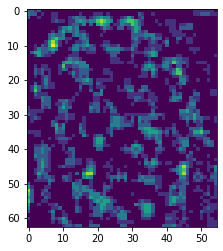

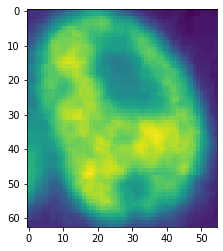

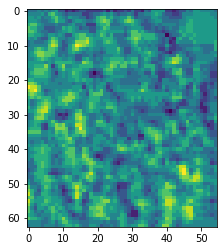

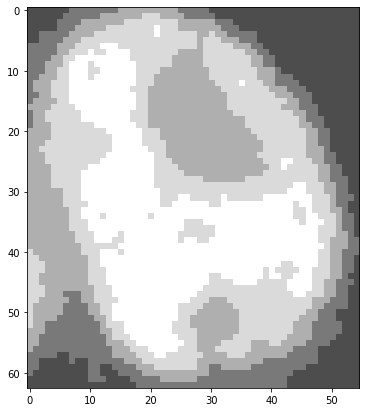

(63, 55) (63, 55, 3)


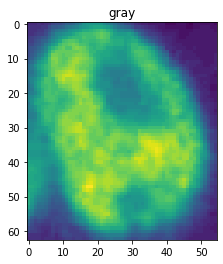

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/Cells/Cells' images/mouchete M0/mouchete M0_10_2.jpg")

for i in range(3):
    plt.imshow(img[:,:,i]) #calculating histogram
    plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

seg = run_kmeans(gray,n_clusters=5, verbose=1)
print(seg.shape, img.shape)
plt.imshow(gray)
plt.title("gray")
plt.show()